#### Test find K nearest neighbors

In [16]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)

In [17]:
X[0]

array([-1, -1])

In [18]:
nbrs.kneighbors([X[0]], return_distance=False, n_neighbors=1)

array([[0]], dtype=int64)

#### Test SOM + KNN

In [19]:
import pandas as pd
import numpy as np

import sys
sys.path.insert(0, '../SOM-LVQ')
from minisom import MiniSom
import LVQ
from supervisedSom import supervisedSom
from SOM_LVQ import SOM_LVQ

In [20]:
data = pd.read_csv(r"../data/AReM/Dataset1(combined).csv")
x = data.iloc[:, 0:6].values
y = data.iloc[:, 6].values
y[y==7] = 0
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=44)

# use Minmaxscaler because we use euclidean distance
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
x_train = minmax.fit_transform(x_train)
x_test = minmax.transform(x_test)

In [21]:
som1 = MiniSom(x = 25, y = 25, input_len = 6, sigma = 1.0, learning_rate = 0.5)
som1.random_weights_init(x_train)
som1.train_random(data = x_train, num_iteration = 100)

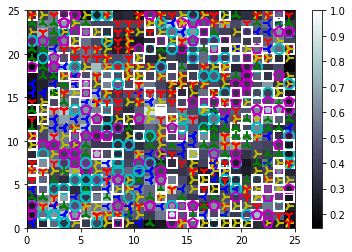

In [22]:
suso1 = supervisedSom(som1, x_train, y_train)

label1= suso1.visualSom()

In [23]:
propa1 = suso1.propabilitySom()

taggings1 = suso1.taggingSom()

In [24]:
predicted_y1 = [suso1.predict(instance) for instance in x_test]

from sklearn.metrics import classification_report

print (classification_report(y_test, predicted_y1, target_names=['0', '1', '2', '3', '4', '5', '6']))

             precision    recall  f1-score   support

          0       0.64      0.62      0.63       133
          1       0.96      0.93      0.95       115
          2       0.93      0.94      0.94       107
          3       0.51      0.53      0.52       120
          4       0.53      0.52      0.53       117
          5       0.59      0.65      0.62       119
          6       0.61      0.57      0.59       129

avg / total       0.67      0.67      0.67       840



In [25]:
taggings1

array([[2., 6., 6., 1., 2., 0., 0., 0., 4., 3., 4., 1., 0., 1., 0., 2.,
        2., 6., 6., 1., 1., 6., 3., 1., 3.],
       [4., 5., 3., 1., 4., 4., 3., 4., 5., 6., 5., 3., 3., 4., 3., 2.,
        5., 1., 1., 5., 1., 5., 0., 1., 3.],
       [4., 5., 2., 3., 5., 1., 3., 0., 3., 6., 0., 2., 2., 0., 4., 4.,
        2., 1., 6., 6., 2., 1., 1., 1., 0.],
       [5., 2., 1., 4., 5., 5., 1., 6., 6., 3., 3., 2., 6., 0., 1., 3.,
        1., 4., 2., 4., 0., 6., 3., 4., 4.],
       [3., 6., 5., 2., 5., 5., 3., 6., 6., 5., 6., 3., 2., 5., 4., 3.,
        4., 4., 5., 0., 0., 4., 6., 3., 6.],
       [4., 1., 0., 5., 5., 5., 6., 6., 1., 1., 6., 2., 2., 5., 2., 4.,
        4., 4., 3., 0., 0., 5., 4., 1., 3.],
       [5., 0., 3., 4., 5., 5., 3., 3., 6., 5., 6., 6., 4., 6., 3., 2.,
        3., 3., 6., 0., 0., 6., 3., 6., 5.],
       [3., 0., 2., 4., 2., 2., 0., 2., 4., 5., 6., 5., 5., 4., 5., 3.,
        4., 5., 3., 3., 3., 3., 4., 6., 0.],
       [5., 5., 6., 2., 5., 5., 5., 5., 4., 5., 6., 5., 3., 0., 

In [27]:
som1.weights[0][0]

array([2.57584056e-01, 5.37119563e-02, 6.75923957e-01, 4.55402650e-02,
       6.86890361e-01, 1.15519477e-08])

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [29]:
np.histogram(y_train, bins = [0, 1, 2, 3, 4, 5, 6, 7])

(array([347, 365, 373, 360, 363, 361, 351], dtype=int64),
 array([0, 1, 2, 3, 4, 5, 6, 7]))

In [37]:
x = som1.weights.shape[0]
y = som1.weights.shape[1]

for i in range (x):
    for j in range(y):
        taggings1[i][j] = knn.predict([som1.weights[i, j]])[0]
suso1.taggings = taggings1
predicted_y_test = [suso1.predict(instance) for instance in x_test]

from sklearn.metrics import classification_report

print (classification_report(y_test, predicted_y_test, target_names=['0', '1', '2', '3', '4', '5', '6']))

             precision    recall  f1-score   support

          0       0.60      0.76      0.67       133
          1       1.00      0.10      0.17       115
          2       0.57      0.98      0.72       107
          3       0.35      0.49      0.41       120
          4       0.00      0.00      0.00       117
          5       0.70      0.66      0.68       119
          6       0.56      0.84      0.68       129

avg / total       0.54      0.55      0.48       840



C:\Users\Thend\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
